## To Do:

1. ~~In A_HEP I have a param for num_attr. However, just get this from the dataframe~~
1. ~~Make a simple mock data~~
1. ~~Run A_HEP on the mock data~~
1. ~~There will probably be bugs so fix them~~
1. ~~Visualize~~
1. ~~I strayed off and started coding EP. This needs to sort `n_lowest_score` and then it should work. This is a good idea. The datatype is acting up?..~~
1. Make your own library and a new notebook
1. Get this working on the real data. This might include some data cleaning
1. There will probably be bugs so fix them
1. Try to teach common cause, common effect, etc...
1. Make better mock data. Maybe a simpler network? 
1. Get the __increase_routine
1. Get the __decrease_routine
1. Get the merge
1. Done with EP

In [1]:
# Note, there will be 10 minutes to present. I think I should get some class partipation

# This might be interesting 
https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html#pomegranate.BayesianNetwork.BayesianNetwork.from_samples



# Occam's Razor
# https://www.cs.cmu.edu/~aarti/Class/10704/lec13-MDL.pdf
import copy
import random
import math

from pgmpy.estimators import BicScore
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from more_itertools import sort_together

In [2]:
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]
sort_together([Y, X])

[(0, 0, 0, 1, 1, 1, 1, 2, 2), ('a', 'd', 'h', 'b', 'c', 'e', 'i', 'f', 'g')]

In [4]:
# can skip for now
"""
def merge(list_of_networks):
    pass

def __increase_routine(offspring_networks,
                       rand_1, 
                       current_population_size, 
                       max_population_size, 
                       current_generation_number,
                       max_generation_number):
    
    next_generation = []
    new_population_size = current_population_size
    i = 0
    while (rand_1 > current_population_size / max_population_size and 
           rand_2 > current_generation_number / max_generation_number and 
           i < current_population_size):
        for network in offspring_networks: #networks are the mutated offspring
            if avg_distance(network) > far_factor.cross(num_nodes(network)):
                next_generation.append(network) # and both its parents
                new_population_size += 1
                
    return next_generation
            
def __decrease_routine():
    pass
"""

'\ndef merge(list_of_networks):\n    pass\n\ndef __increase_routine(offspring_networks,\n                       rand_1, \n                       current_population_size, \n                       max_population_size, \n                       current_generation_number,\n                       max_generation_number):\n    \n    next_generation = []\n    new_population_size = current_population_size\n    i = 0\n    while (rand_1 > current_population_size / max_population_size and \n           rand_2 > current_generation_number / max_generation_number and \n           i < current_population_size):\n        for network in offspring_networks: #networks are the mutated offspring\n            if avg_distance(network) > far_factor.cross(num_nodes(network)):\n                next_generation.append(network) # and both its parents\n                new_population_size += 1\n                \n    return next_generation\n            \ndef __decrease_routine():\n    pass\n'

In [5]:
def create_population(p_init, var_names):
    population = []
    
    for _ in range(p_init):
        matrix = []
        for _ in range(len(var_names)):
            array = [random.randint(0, 1) for _ in range(len(var_names))]
            matrix.append(array)
        
        population.append(network(matrix, var_names))
    
    return population

In [6]:
def A_HEP(p_init, Gen_total, dataframe):
    """
    p_init : Initial population size
    Gen_total: Total generation number
    num_attr: The number of attributes in the data
    """
    
    num_attr = len(dataframe.columns)
    
    scorer = MDL_Scorer(dataframe)
    
    Gen_c = 0 # current generation number
    population = create_population(p_init, list(dataframe.columns))
    p_c = len(population) # current population size
    
    while Gen_c < Gen_total:
        shuffled = population.copy()
        random.shuffle(shuffled)
        to_merge = shuffled[:int(len(shuffled)/2)]
        # merge(to_merge) 
        unselected = shuffled[int(len(shuffled)/2):]
        
        offspring = []
        for network in unselected:
            offspring.append(network.mutate())
        population += offspring
            
        Gen_c +=1
        # p_new = this is the increase and decrease routines
        # p_c = p_new

    return scorer.lowest_score(population)

In [7]:
def EP(p_init, Gen_total, dataframe):
    """
    p_init : Initial population size
    Gen_total: Total generation number
    num_attr: The number of attributes in the data
    """
    
    num_attr = len(dataframe.columns)
    
    scorer = MDL_Scorer(dataframe)
    
    Gen_c = 0 # current generation number
    population = create_population(p_init, list(dataframe.columns))
    p_c = len(population) # current population size
    
    while Gen_c < Gen_total:
        shuffled = population.copy()
        random.shuffle(shuffled)
        to_merge = shuffled[:int(len(shuffled)/2)]
        # merge(to_merge) 
        unselected = shuffled[int(len(shuffled)/2):]
        
        offspring = []
        for network in unselected:
            offspring.append(network.mutate())
        population += offspring
        population = scorer.n_lowest_score(int(len(population) / 2), population)
            
        Gen_c +=1
        # p_new = this is the increase and decrease routines
        # p_c = p_new

    return scorer.lowest_score(population)

## Sample on a simple dataset

A --> B and A --> C

So
Rain --> Wet Grass,
Rain --> Neighbors grass is wet

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


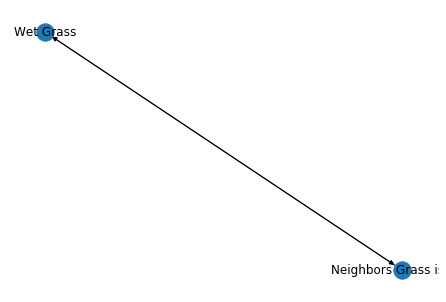

In [8]:
data = pd.DataFrame([[1, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1]])
data = pd.DataFrame([['y', 'y', 'y'], ['n', 'n', 'n'], ['y', 'y', 'y'], ['n', 'y', 'n'], ['n', 'n', 'y']])
data.columns = ['Rain', 'Wet Grass', 'Neighbors Grass is Wet']
# bc = BicScore(data)
# m1 = np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0]])

r = EP(p_init=100, Gen_total=100, dataframe=data)
r['best_network'].draw()
print()

Interesting. It seems to be ignoring the Rain common parent. I wonder if this is my fault or its fault

## Let's try to understand the MDL Score a bit better

# Constant data, modify the network to try to manipulate the scores

In [9]:
data = pd.DataFrame([['y', 'y', 'y'], ['n', 'n', 'n'], ['y', 'y', 'y'], ['n', 'y', 'n'], ['n', 'n', 'y']])
data.columns = ['Rain', 'Wet Grass', 'Neighbors Grass is Wet']

scorer = MDL_Scorer(data)

def test(array):
    n = network(np.array(array), data.columns)
    n.draw()
    print(scorer.score(n))

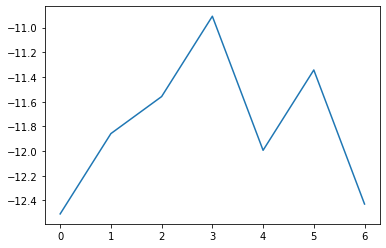

In [10]:
matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
n = network(matrix, data.columns)
scores = [scorer.score(n)]

for i in range(len(matrix)):
    for j in range(len(matrix)):
        if i != j:
            n.matrix[i][j] = 1
            scores.append(scorer.score(n))
        
plt.plot(list(range(len(scores))), scores)